<a href="https://colab.research.google.com/github/rhiriyappa/PyTorch/blob/main/PyTorch_Detect_Playing_Cards.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Train Your Very First Pytorch Model!
Let's learn through doing.

In this notebook we will create an image classifier to detect playing cards.

We will tackle this problem in 3 parts:

1. Pytorch Dataset
2. Pytorch Model
3. Pytorch Training Loop

Almost every pytorch model training pipeline meets this paradigm.



In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm

import matplotlib.pyplot as plt # For data viz
import pandas as pd
import numpy as np
import sys
from tqdm.notebook import tqdm

print('System Version:', sys.version)
print('PyTorch version', torch.__version__)
print('Torchvision version', torchvision.__version__)
print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)

System Version: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
PyTorch version 2.8.0+cu126
Torchvision version 0.23.0+cu126
Numpy version 2.0.2
Pandas version 2.2.2


timm - Py**T**orch **Im**age **M**odels (timm) is a collection of image models, layers, utilities, optimizers, schedulers, data loaders/augmentations, and reference training/validation scripts that aim to pull together a wider of SOTA (state of the art) models with ability to reproduce ImageNet training results.

### Step 1. Pytorch Dataset (and Dataloader)
Would you learn how to bake a cake without first having the ingredients? No.

The same thing can be said for training a pytorch model without first having the dataset setup correctly.

This is why datasets are important:

* It's an organized way to structure how the data and labels are loaded into the model.
* We can then wrap the dataset in a dataloader and pytorch will handle batching the shuffling the data for us when training the model!

In [2]:
class PlayingCardDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data = ImageFolder(data_dir, transform=transform)

    # How many examples are we feeding into data loader
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

    @property
    def classes(self):
        return self.data.classes

### Create test dataset


In [3]:
dataset = PlayingCardDataset(
    data_dir='/content/drive/MyDrive/Data science projects/pytorch/dataset/train'
)

In [23]:
print(type(dataset))

<class '__main__.PlayingCardDataset'>


In [10]:
len(dataset)

7624

In [14]:
print(dataset[0])
print(dataset[4002])

(<PIL.Image.Image image mode=RGB size=224x224 at 0x7A01C28E3380>, 0)
(<PIL.Image.Image image mode=RGB size=224x224 at 0x7A01C1AB2CF0>, 27)


27


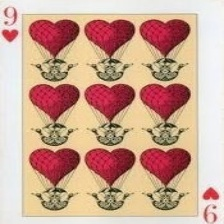

In [18]:
image, label = dataset[4002]
print(label)
image

In [29]:
# "Pretty-print" for making output more readable and visually appealing,
# especially for nested or complex objects
from pprint import pprint

# Get a dictionary associating target values with folder names
data_dir = '/content/drive/MyDrive/Data science projects/pytorch/dataset/train'
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
pprint(target_to_class)

{0: 'ace of clubs',
 1: 'ace of diamonds',
 2: 'ace of hearts',
 3: 'ace of spades',
 4: 'eight of clubs',
 5: 'eight of diamonds',
 6: 'eight of hearts',
 7: 'eight of spades',
 8: 'five of clubs',
 9: 'five of diamonds',
 10: 'five of hearts',
 11: 'five of spades',
 12: 'four of clubs',
 13: 'four of diamonds',
 14: 'four of hearts',
 15: 'four of spades',
 16: 'jack of clubs',
 17: 'jack of diamonds',
 18: 'jack of hearts',
 19: 'jack of spades',
 20: 'joker',
 21: 'king of clubs',
 22: 'king of diamonds',
 23: 'king of hearts',
 24: 'king of spades',
 25: 'nine of clubs',
 26: 'nine of diamonds',
 27: 'nine of hearts',
 28: 'nine of spades',
 29: 'queen of clubs',
 30: 'queen of diamonds',
 31: 'queen of hearts',
 32: 'queen of spades',
 33: 'seven of clubs',
 34: 'seven of diamonds',
 35: 'seven of hearts',
 36: 'seven of spades',
 37: 'six of clubs',
 38: 'six of diamonds',
 39: 'six of hearts',
 40: 'six of spades',
 41: 'ten of clubs',
 42: 'ten of diamonds',
 43: 'ten of hear

**Torchvision** supports common computer vision transformations in the torchvision.transforms.v2 module. Transforms can be used to transform and augment data, for both training or inference. The following objects are supported:

* Images as pure tensors, *Image* or PIL image
* Videos as *Video*
* Axis-aligned and rotated bounding boxes as *BoundingBoxes*
* Segmentation and detection masks as *Mask*
* KeyPoints as *KeyPoints*.

In [30]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

data_dir = '/content/drive/MyDrive/Data science projects/pytorch/dataset/train'
dataset = PlayingCardDataset(data_dir, transform)

In [34]:
image, pabel = dataset[4002]
print(image.shape)
print(image)

torch.Size([3, 128, 128])
tensor([[[0.9333, 0.9255, 0.9255,  ..., 0.9569, 0.9490, 0.9490],
         [0.9137, 0.9294, 0.9294,  ..., 0.9608, 0.9490, 0.9412],
         [0.9176, 0.9333, 0.9294,  ..., 0.9608, 0.9490, 0.9451],
         ...,
         [0.9020, 0.9098, 0.9176,  ..., 0.9725, 0.9412, 0.9529],
         [0.9098, 0.9137, 0.9216,  ..., 0.9490, 0.9608, 0.9529],
         [0.9137, 0.9216, 0.9255,  ..., 0.9333, 0.9569, 0.9412]],

        [[0.9176, 0.9176, 0.9255,  ..., 0.9412, 0.9333, 0.9294],
         [0.9020, 0.9216, 0.9294,  ..., 0.9490, 0.9333, 0.9216],
         [0.9059, 0.9294, 0.9255,  ..., 0.9569, 0.9412, 0.9294],
         ...,
         [0.8941, 0.9020, 0.9098,  ..., 0.9137, 0.9020, 0.9176],
         [0.8980, 0.9020, 0.9059,  ..., 0.9098, 0.9294, 0.9176],
         [0.8941, 0.9020, 0.9098,  ..., 0.9294, 0.9451, 0.9176]],

        [[0.8667, 0.8706, 0.8902,  ..., 0.9176, 0.9098, 0.9059],
         [0.8627, 0.8863, 0.9020,  ..., 0.9294, 0.9137, 0.9059],
         [0.8863, 0.9059, 0.9020

In [37]:
image, label = dataset[4002]
image.shape

torch.Size([3, 128, 128])

In [38]:
# iterate over dataset
for image, label in dataset:
    break

tensor([[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
        ...,
        [0.0627, 0.0627, 0.0588,  ..., 1.0000, 1.0000, 1.0000],
        [0.7373, 0.7373, 0.7294,  ..., 1.0000, 1.0000, 1.0000],
        [0.9882, 0.9882, 0.9882,  ..., 1.0000, 1.0000, 1.0000]])

### Dataloaders
* Batching our dataset
* It's faster to train the model in batches instead of one at a time.

In [43]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [44]:
for images, labels in dataloader:
    break

In [45]:
images.shape, labels.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [46]:
labels

tensor([37,  2, 36,  9, 35, 42, 38, 21,  0, 24, 48, 28, 32, 41, 39, 39, 50, 21,
        19, 24, 31,  7, 44, 47, 42, 19,  5, 22, 47,  4, 20, 45])